In [ ]:
import numpy as np
import h5py
import torch
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdate
from datetime import date

[ 80.  85.  33.  41.  37.  52.  55.  44.  46.  41.  55.  44.  47.  34.
  46.  48.  57.  42.  26.  41.  59.  24.  30.  22.  33.  40.  41.  40.
  42.  49.  46.  45.  43.  36.  57.  55.  52.  51.  39.  53.  92.  40.
  55.  85.  82.  97.  92. 105.  97. 108. 106. 134. 116. 122. 149. 168.
 168. 203. 182. 212. 197. 228. 255. 306. 293. 340. 394. 335. 444. 415.
 411. 439. 377. 449. 480. 416. 468. 410. 434. 410. 395. 392. 375. 356.
 320. 410. 361. 347. 304. 365. 335. 317. 324. 320. 289. 297. 357. 306.
 365. 313. 399. 355. 356. 331. 357. 365. 391. 333. 372. 331. 339. 386.
 346. 333. 297. 312. 237. 367. 260. 385. 314. 308. 331. 298. 280. 300.
 256. 270. 274. 269. 253. 243. 255. 249. 262. 253. 271. 194. 245. 255.
 197. 232. 227. 239. 217. 189. 173. 206. 200. 194. 236. 218. 219. 216.
 224. 223. 188. 199. 233. 175. 226. 225. 209. 202. 224. 224. 239. 263.
 209. 180. 196. 199. 220. 256. 229. 233. 198. 242. 230. 182. 199. 208.
 203. 224. 257. 215. 216. 218. 242. 240. 217. 259. 231. 228. 217. 195.
 251. 

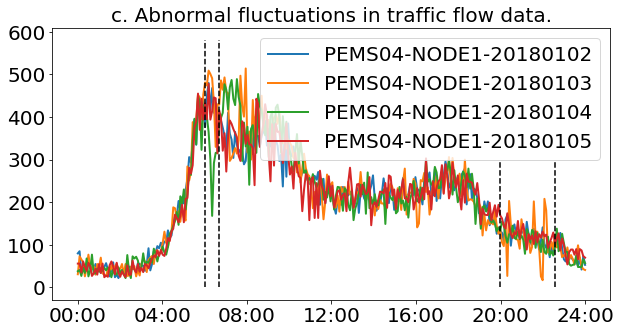

In [40]:
import numpy as np
import matplotlib.pyplot as plt
data4 = np.load('PEMS04/PEMS04.npz')
data = data4['data']
data = np.array(data[:,:,0])
data = data[:,1]

plt.figure(figsize=(10,5))
plt.tick_params(labelsize=15)  # 调整坐标轴刻度的字体大小
label = ["PEMS04-NODE1-20180102","PEMS04-NODE1-20180103","PEMS04-NODE1-20180104","PEMS04-NODE1-20180105"]
for i in range(2,6):
    a = data[288*(i-1):288*i]
    print(a)
    plt.plot(a, label=label[i-2], linewidth=2)  # 调整线条粗细

# 设置横坐标为每4小时，格式为 "00:00"
hours = ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00']
ticks = np.linspace(0, len(a)-1, 25)
ticks_to_display = ticks[::4]

plt.xticks(ticks=ticks_to_display, labels=hours, fontsize=20)
plt.yticks(fontsize=20)  # 调整纵坐标刻度的字体大小

plt.vlines([72, 80], 0, 580, linestyles='dashed', colors='black')
plt.vlines([239, 270], 0, 300, linestyles='dashed', colors='black')

plt.title("c. Abnormal fluctuations in traffic flow data.", fontsize=20)  # 标题字体大小
plt.legend(fontsize=20, loc=1)  # 图例字体大小
plt.savefig('c.jpg', dpi=600)
plt.show()


[[ 80.  83.  30. ...   8. 115.  45.]
 [ 85.  88.  31. ...  17.  94.  55.]
 [ 33.  88.  35. ...   8.  75.  49.]
 ...
 [ 43.  72.  75. ...  19.  53.  60.]
 [ 41.  75.  36. ...  14.  36.  58.]
 [ 38.  64.  48. ...  10.  16.  25.]]
577
577


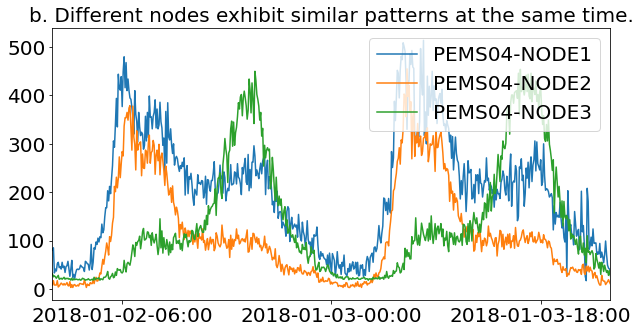

In [39]:
import matplotlib.dates as mdate
from datetime import date


data = data4['data']
data = np.array(data[:,:,0])
# print(np.array(data[...,0]).shape)
# print(np.array(data[:,:,0]).shape)
# print(data[:15725].mean(),data[:15725].std())
# print(data[15725:20966].mean(),data[15725:20966].std())
# print(data[20966:].mean(),data[20966:].std())
# print(data[:,:,0].mean(),data[:,:,0].std())
data = data[:,1:10]
data = data[288:288*3+1]
print(data)


def myplot(x, y, label=None, xlimit=None, size=(5,5),fileName=None,title=None):
    if len(x) == len(y):
        plt.figure(figsize=size)
        plt.tick_params(labelsize=13)
        if xlimit and isinstance(xlimit, tuple):
            plt.xlim(xlimit)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20) 
        # plt.plot(x, y, label=label[0])
        plt.gca().xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d-%H:%M'))
        plt.gca().xaxis.set_major_locator(mdate.HourLocator(interval=18))
        plt.plot(x, y[:,0], label=label[0])

        plt.plot(x, y[:,6], label=label[1])

        plt.plot(x, y[:,5], label=label[2])


        plt.title(title,fontsize=20)
        plt.legend(fontsize=20,loc=1)
            
        if fileName:
            plt.savefig(fileName,dpi=600)
        plt.show()
    else:
        raise ValueError("x 和 y 的长度不一致！")


x = pd.date_range('2018-1-2','2018-1-4',freq='5min')
print(len(x))
print(len(data))
myplot(x, data, label=['PEMS04-NODE1','PEMS04-NODE2','PEMS04-NODE3','PEMS04-NODE4'], 
       xlimit=(date(2018, 1, 2), date(2018, 1, 4) ),
       size=(10, 5),title="b. Different nodes exhibit similar patterns at the same time.",
       fileName='b.jpg')

# plt.plot(data)

[80. 85. 33. ... 45. 49. 50.]
3745
3745


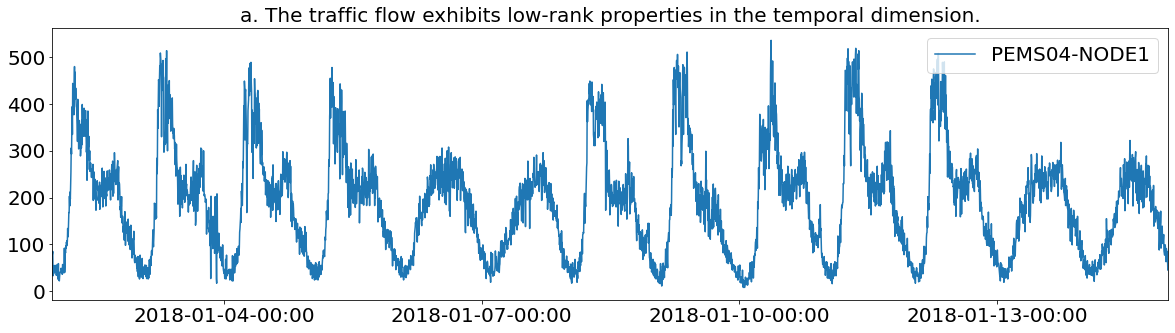

In [41]:
import matplotlib.dates as mdate
from datetime import date


data = data4['data']
data = np.array(data[:,:,0])

data = data[:,1]
data = data[288:288*14+1]
print(data)

def myplot(x, y, label=None, xlimit=None, size=(10,5),fileName=None,title=None):
    if len(x) == len(y):
        plt.figure(figsize=size)
        plt.tick_params(labelsize=13)
        if xlimit and isinstance(xlimit, tuple):
            plt.xlim(xlimit)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)         
        plt.plot(x, y, label=label[0])

        plt.gca().xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d-%H:%M'))
        plt.gca().xaxis.set_major_locator(mdate.HourLocator(interval=72))
        plt.title(title,fontsize=20)
        plt.legend(fontsize=20,loc=1)
            
        if fileName:
            plt.savefig(fileName,dpi=600)
        plt.show()
    else:
        raise ValueError("x 和 y 的长度不一致！")

x = pd.date_range('2018-1-2','2018-1-15',freq='5min')
print(len(x))
print(len(data))
myplot(x, data, label=['PEMS04-NODE1','PEMS04-NODE2','PEMS04-NODE3','PEMS04-NODE4'], 
       xlimit=(date(2018, 1, 2), date(2018, 1, 15) ),
       size=(20, 5),title="a. The traffic flow exhibits low-rank properties in the temporal dimension.",
       fileName='a.jpg')


In [42]:
from PIL import Image

def comb(png1, png2, style='horizontal'):

    img1, img2 = Image.open(png1), Image.open(png2)
    # 统一图片尺寸，可以自定义设置（宽，高）
    # img1 = img1.resize((1500, 1000), Image.ANTIALIAS)
    # img2 = img2.resize((1500, 1000), Image.ANTIALIAS)
    size1, size2 = img1.size, img2.size
    if style == 'horizontal':
        joint = Image.new('RGB', (size1[0] + size2[0], size1[1]))
        loc1, loc2 = (0, 0), (size1[0], 0)
        joint.paste(img1, loc1)
        joint.paste(img2, loc2)
        joint.save('horizontal.jpg', dpi=(1200, 600))
    elif style == 'vertical':
        joint = Image.new('RGB', (size1[0], size1[1] + size2[1]))
        loc1, loc2 = (0, 0), (0, size1[1])
        joint.paste(img1, loc1)
        joint.paste(img2, loc2)
        joint.save('vertical.jpg', dpi=(1200, 1200))

if __name__ == '__main__':
    # 两张图片地址：
    png1 = r"./c.jpg"
    png2 = r"./b.jpg"
    png3 = r"./a.jpg"
    h = r"./horizontal.jpg"
    # 左右拼接
    # comb(png1, png2, style='horizontal')

    # 上下拼接

    comb(png2, png1, style='horizontal')
    comb(png3, h, style='vertical')

    
